For this homework, make sure that you format your notbook nicely and cite all sources in the appropriate sections. Programmatically generate or embed any figures or graphs that you need.

Names: __YOUR NAMES HERE__

Step 1: Train your own word embeddings
--------------------------------

(describe the provided dataset that you have chosen here)

Describe what data set you have chosen to compare and contrast with the your chosen provided dataset. Make sure to describe where it comes from and it's general properties.

(describe your dataset here)

In [13]:
import string

# import your libraries here
import nltk
import pandas as pd
import keras
import numpy as np
from gensim.models import KeyedVectors
from collections import Counter
import multiprocessing
from nltk.corpus import stopwords
from string import punctuation

### a) Train embeddings on GIVEN dataset

In [2]:
# code to train your word embeddings

SPOOKY_AUTHOR_TEXT = "spooky-author-identification/train.csv"

# Read the file and prepare the training data 
# so that it is in the following format
df_spooky = pd.read_csv(SPOOKY_AUTHOR_TEXT)

# data = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
# 			['this', 'is', 'the', 'second', 'sentence'],
# 			['yet', 'another', 'sentence'],
# 			['one', 'more', 'sentence'],
# 			['and', 'the', 'final', 'sentence']]

df_spooky

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP


In [3]:
from gensim.models import Word2Vec

# make all the text lowercase
df_spooky.text = df_spooky.text.str.lower()

# save the data as a list of tokenized sentences
spooky_data = df_spooky.text.apply(nltk.word_tokenize).tolist()

# The dimension of word embedding. 
# This variable will be used throughout the program
# you may vary this as you desire
EMBEDDINGS_SIZE = 200

# Train the Word2Vec model from Gensim. 
# Below are the hyperparameters that are most relevant. 
# But feel free to explore other 
# options too:
sg = 1
window = 5
vector_size = EMBEDDINGS_SIZE
min_count = 1

model_spooky = Word2Vec(sentences=spooky_data, vector_size=vector_size, window=window, min_count=min_count, sg=sg, workers=multiprocessing.cpu_count())

In [4]:
# if you save your Word2Vec as the variable model, this will 
# print out the vocabulary size
print('Vocab size: {}'.format(len(model_spooky.wv)))

Vocab size: 25383


In [18]:
# You can save file in txt format, then load later if you wish.
model_spooky.wv.save_word2vec_format('embeddings.txt', binary=False)

### b) Train embedding on YOUR dataset

In [6]:
from nltk.corpus import reuters
file_ids = reuters.file_ids = reuters.fileids()

all_sents = []
for file_id in file_ids:
    sent_tokens = reuters.sents(file_id)
    sentences = [" ".join(list_of_words).lower() for list_of_words in sent_tokens]
    all_sents.extend(sentences)

reuters_json = {"text": all_sents}
df_reuters = pd.DataFrame.from_dict(reuters_json)

df_reuters

,text
0,asian exporters fear damage from u . s .- japa...
1,they told reuter correspondents in asian capit...
2,but some exporters said that while the conflic...
3,the u . s . has said it will impose 300 mln dl...
4,unofficial japanese estimates put the impact o...
...,...
54706,knight - ridder inc & lt ; krn > sets quarterl...
54707,technitrol inc & lt ; tnl > sets quarterly qtl...
54708,nationwide cellular service inc & lt ; ncel > ...
54709,& lt ; a . h . a .


In [7]:
reuters_data = df_reuters.text.apply(nltk.word_tokenize).tolist()
model_reuters = Word2Vec(sentences=reuters_data, vector_size=vector_size, window=window, min_count=min_count, sg=sg, workers=multiprocessing.cpu_count())
print('Vocab size: {}'.format(len(model_reuters.wv)))

Vocab size: 30996


In [8]:
print(reuters.raw(file_ids[0]))
print(reuters.sents(file_ids[0]))

ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict would hurt
  them in the long-run, in the short-term Tokyo's loss might be
  their gain.
      The U.S. Has said it will impose 300 mln dlrs of tariffs on
  imports of Japanese electronics goods on April 17, in
  retaliation for Japan's alleged failure to stick to a pact not
  to sell semiconductors on world markets at below cost.
      Unofficial Japanese estimates put the impact of the tariffs
  at 10 billion dlrs and spokesmen for major electronics firms
  said they would virtually halt exports

https://testanother-codwar.medium.com/sentiment-analysis-on-nltk-reuters-corpus-2feed2a695e7

What text-normalization and pre-processing did you do and why? __YOUR ANSWER HERE__

Step 2: Evaluate the differences between the word embeddings
----------------------------

(make sure to include graphs, figures, and paragraphs with full sentences)

In [15]:
# find the most common words between the two datasets
word_counts = Counter()
for text in spooky_data:
    word_counts.update(text)

for text in reuters_data:
    word_counts.update(text)

# set intersection minus stop words
common_words = set.intersection(set(model_spooky.wv.index_to_key), set(model_reuters.wv.index_to_key))
stop_words = set(stopwords.words('english'))

words_to_keep = common_words - stop_words
overlap_word_counts = {}
for word in words_to_keep:
    if not any(p in word for p in punctuation):
        overlap_word_counts[word] = word_counts[word]

common_word_counter = Counter(overlap_word_counts)

print(common_word_counter.most_common()[:20])

[('said', 26087), ('year', 7628), ('net', 6995), ('u', 6403), ('would', 5931), ('loss', 5168), ('company', 4744), ('one', 4586), ('bank', 3672), ('last', 3581), ('oil', 3293), ('share', 3174), ('trade', 3121), ('two', 3096), ('new', 2978), ('profit', 2966), ('market', 2822), ('could', 2798), ('also', 2739), ('stock', 2635)]


In [19]:
from sklearn.manifold import TSNE

keys = [word for word, _ in common_word_counter.most_common()[:20]]

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_spooky.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model_spooky.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [20]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/var/folders/5p/5z6fw3rd3cv3wr_xlglft0ch0000gn/T/ipykernel_2837/1229523120.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


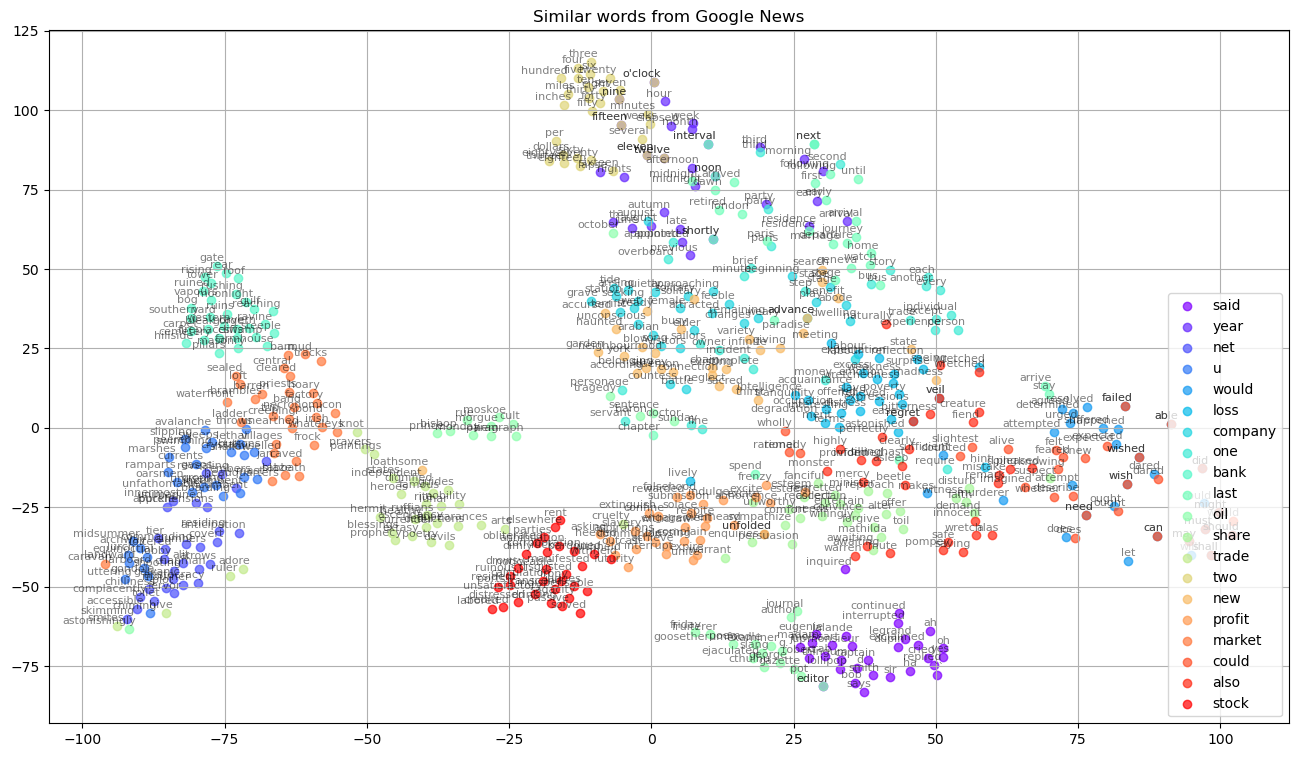

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# % matplotlib inline

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Spooky Authors', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

## Write down your analysis:

Cite your sources:
-------------
- https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

Step 3: Feedforward Neural Language Model
--------------------------

### a) First, encode  your text into integers

In [11]:
# Importing utility functions from Keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# The size of the ngram language model you want to train
# change as needed for your experiments
NGRAM = 3 

# Initializing a Tokenizer
# It is used to vectorize a text corpus. Here, it just creates a mapping from 
# word to a unique index. (Note: Indexing starts from 0)
# Example:
with open("shakesdown.txt","r",encoding="utf-8") as f:
    lines = [l for l in f.readlines() if len(l.strip()) > 0]
corpus = lines
# corpus = ["Hello world.","Goodbye cruel world.","Hello, love.","This world is the best world, because you are in it."]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
# encoded = tokenizer.texts_to_sequences(["Hello, my love, my world.","I love you more than the world itself."])
encoded = tokenizer.texts_to_sequences(corpus)
# print(encoded)
VOCAB_SIZE = len(tokenizer.word_counts)
print(VOCAB_SIZE)

NameError: name 'df' is not defined

### b) Next, prepare your sequences from text

#### Fixed ngram based sequences 

In [ ]:
def generate_ngram_training_samples(encoded: list[list[int]], ngram:int) -> list[list[int]]:
    '''
    Takes the encoded data (list of lists) and 
    generates the training samples out of it.
    Parameters:
    up to you, we've put in what we used
    but you can add/remove as needed
    return: 
    list of lists in the format [[x1, x2, ... , x(n-1), y], ...]
    '''
    # flattened list comprehension
    samples = np.array([np.array(sentence[i:i+ngram]) for sentence in encoded for i in range(len(sentence)-ngram+1)])
    return samples

ngram_samples = generate_ngram_training_samples(encoded, NGRAM)
print("ngram_samples:",ngram_samples[:4])
# [f"{a},{b}" for b in range(5) for a in range(b)]


### c) Then, split the sequences into X and y and create a Data Generator

In [ ]:
# Note here that the sequences were in the form: 
# sequence = [x1, x2, ... , x(n-1), y]
# We still need to separate it into [[x1, x2, ... , x(n-1)], ...], [y1, y2, ...]

# returns X and y using given encoded ngram training samples
def split_X_y(samples: list[list[int]]) -> tuple[list[list[int]],list[int]]:
    return np.array([l[:-1] for l in samples]), np.array([l[-1] for l in samples])

X, y = split_X_y(ngram_samples)
print("X:",X)
print("y:",y)

In [ ]:
# JUST FOR TESTING PURPOSES SINCE I DONT HAVE WORD EMBEDDINGS TO WORK WITH
"""
import gensim.downloader
EMBEDDINGS_SIZE = 100
glove_vectors = gensim.downloader.load('glove-twitter-100')
"""

In [ ]:
def read_embeddings(tokenizer: Tokenizer, model: KeyedVectors) -> tuple[dict[str,list], dict[int,list]]:
    '''Loads and parses embeddings trained in earlier.
    Parameters and return values are up to you.
    '''
    
    # you may find generating the following two dicts useful:
    # word to embedding : {'the':[0....], ...}
    # index to embedding : {1:[0....], ...} 
    # use your tokenizer's word_index to find the index of
    # a given word
    word_embeddings = {w:model[w]  if w in model else np.zeros(EMBEDDINGS_SIZE) for w in tokenizer.word_index}
    encoded_embeddings = {tokenizer.word_index[w]:word_embeddings[w] for w in word_embeddings}
    return word_embeddings, encoded_embeddings


word_embed, enc_embed = read_embeddings(tokenizer,glove_vectors)
enc_embed[529]

In [ ]:
def data_generator(X, y, batch_size: int, tokenizer: Tokenizer, enc_embed:dict) -> tuple[list,list]:
    '''
    Returns data generator to be used by feed_forward
    https://wiki.python.org/moin/Generators
    https://realpython.com/introduction-to-python-generators/
    
    Yields batches of embeddings and labels to go with them.
    Use one hot vectors to encode the labels 
    (see the to_categorical function)
    
    '''
    i = 0

    for i in range(0,len(y),batch_size):
        next_i = min(len(y), i+batch_size)
        # for each sequence in the batch, flatten all word embedding vectors into one vector
        embeddings = np.array([[weight for word_index in sequence for weight in enc_embed[word_index]] for sequence in X[i:next_i]])
        labels = to_categorical(y[i:next_i]-1,num_classes=len(tokenizer.word_counts))
        yield embeddings, labels




In [ ]:
# Examples
# initialize data_generator
num_sequences_per_batch = 128 # this is the batch size
steps_per_epoch = len(ngram_samples)//num_sequences_per_batch  # Number of batches per epoch
train_generator = data_generator(X, y, num_sequences_per_batch, tokenizer, enc_embed)

sample=next(train_generator) # this is how you get data out of generators
print(sample[0].shape) # (batch_size, (n-1)*EMBEDDING_SIZE)  (128, 200)
print(sample[1].shape)   # (batch_size, |V|) to_categorical

### d) Train your models

In [ ]:
# code to train a feedforward neural language model 
# on a set of given word embeddings
# make sure not to just copy + paste to train your two models

num_sequences_per_batch = 128 # this is the batch size
steps_per_epoch = len(ngram_samples)//num_sequences_per_batch  # Number of batches per epoch
train_generator = data_generator(X, y, num_sequences_per_batch, tokenizer, enc_embed)
sample=next(train_generator) # this is how you get data out of generators
print(sample[0].shape, "; (n-1)*EMBEDDING_SIZE) =",(NGRAM-1)*EMBEDDINGS_SIZE) # (batch_size, (n-1)*EMBEDDING_SIZE)  (128, 200)
print(sample[1].shape)   # (batch_size, |V|) to_categorical

# Define the model architecture using Keras Sequential API
model = Sequential()
model.add(layer_i := Dense(100, input_dim=(NGRAM-1)*EMBEDDINGS_SIZE)) 
model.add(layer_h1 := Dense(200, activation='relu'))
model.add(layer_h2 := Dense(200, activation='relu'))
model.add(layer_o := Dense(VOCAB_SIZE)) 

# for a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Start training the model
model.fit(x=train_generator, 
          steps_per_epoch=steps_per_epoch,
          epochs=1)

In [ ]:
# Start training the model
fnn.fit(x=train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=1)

### e) Generate Sentences

In [ ]:
# generate a sequence from the model
def generate_seq(model: Sequential, 
                 tokenizer: Tokenizer, 
                 seed: list, 
                 n_words: int):
    '''
    Parameters:
        model: your neural network
        tokenizer: the keras preprocessing tokenizer
        seed: [w1, w2, w(n-1)]
        n_words: generate a sentence of length n_words
    Returns: string sentence
    '''
    pass

### f) Compare your generated sentences

You may find it useful to run your HW 2 code on one of the datasets (or a subset of the dataset) that you used for this homework.

Sources Cited
----------------------------


- https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/
- https://keras.io/api/layers/core_layers/dense/